In [1]:
# Connecting Google Drive with Google Colab

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import numpy as np
import pandas as pd

In [3]:
# Loading the dataset

df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/datasets/Churn_Modelling.csv')

In [4]:
df.shape

(10000, 14)

In [5]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [7]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

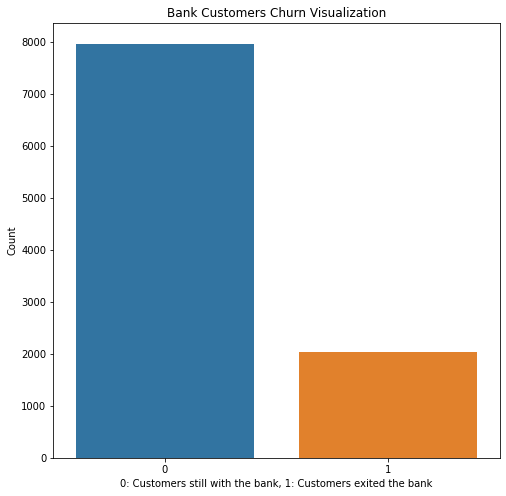

In [9]:
# Visualizing the count of 'exited customers' in the dataset

plt.figure(figsize=(8,8))
sns.countplot(x='Exited', data=df)
plt.xlabel('0: Customers still with the bank, 1: Customers exited the bank')
plt.ylabel('Count')
plt.title('Bank Customers Churn Visualization')
plt.show()

In [10]:
# check for null values
df.isna().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [11]:
# The columns 'RowNumber','CustomerId' and 'Surname' are no way related to the output, so we will drop these rows 

df.drop(['RowNumber','CustomerId','Surname'], axis=1, inplace=True)
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [12]:
# One hot encoding for the columns 'Geography' and 'Gender'

geography = pd.get_dummies(df['Geography'], drop_first=True)
gender = pd.get_dummies(df['Gender'], drop_first=True)

In [13]:
# Appending the columns to original dataframe

df = pd.concat([df, geography, gender], axis=1)
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Germany', 'Spain', 'Male'],
      dtype='object')

In [14]:
# drop 'Geography' and 'Gender' as we have dummies 

df.drop(['Geography', 'Gender'], axis=1, inplace=True)

In [15]:
df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Germany', 'Spain',
       'Male'],
      dtype='object')

# Train and test 

In [16]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [17]:
# Splitting the dataset into train and test sets.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (8000, 11), X_test size: (2000, 11)


# Feature Scaling

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Building Artificial Neural Network (ANN)

In [19]:
# Importing the Keras libraries and packages

import keras
from keras.models import Sequential
from keras.layers import Dense

In [21]:
# Initialising the ANN

classifier = Sequential()

In [22]:
# Adding the input layer and the first hidden layer

classifier.add(Dense(units=6, kernel_initializer='he_uniform', activation='relu', input_dim=11))

In [23]:
# Adding the second hidden layer

classifier.add(Dense(units=6, kernel_initializer='he_uniform', activation='relu'))

In [24]:
# Adding the output layer

classifier.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))

In [25]:
# Compiling the ANN

classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [26]:
# Fitting the ANN to the Training set
model_history = classifier.fit(X_train, y_train, batch_size=10, validation_split=0.33, epochs=100)

Epoch 1/100
536/536 [==============================] - 2s 3ms/step - loss: 0.5485 - accuracy: 0.7582 - val_loss: 0.4815 - val_accuracy: 0.7989
Epoch 2/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4513 - accuracy: 0.8063 - val_loss: 0.4527 - val_accuracy: 0.8016
Epoch 3/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4257 - accuracy: 0.8123 - val_loss: 0.4362 - val_accuracy: 0.8069
Epoch 4/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4101 - accuracy: 0.8182 - val_loss: 0.4240 - val_accuracy: 0.8092
Epoch 5/100
536/536 [==============================] - 2s 3ms/step - loss: 0.3965 - accuracy: 0.8224 - val_loss: 0.4134 - val_accuracy: 0.8171
Epoch 6/100
536/536 [==============================] - 2s 3ms/step - loss: 0.3846 - accuracy: 0.8274 - val_loss: 0.4027 - val_accuracy: 0.8209
Epoch 7/100
536/536 [==============================] - 2s 3ms/step - loss: 0.3741 - accuracy: 0.8324 - val_loss: 0.3939 - val_accuracy: 0.8300

In [27]:
# List all data in history
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

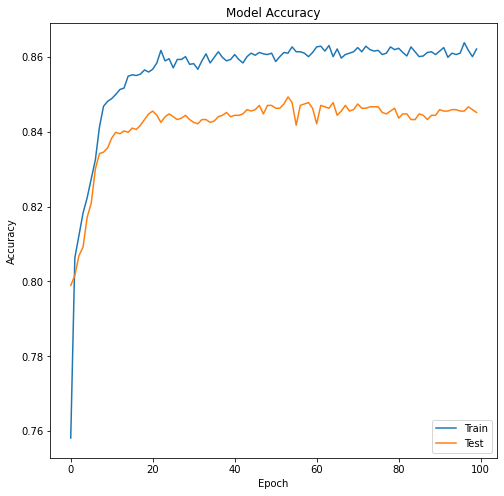

In [28]:
# Summarize history for accuracy

plt.figure(figsize=(8,8))

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

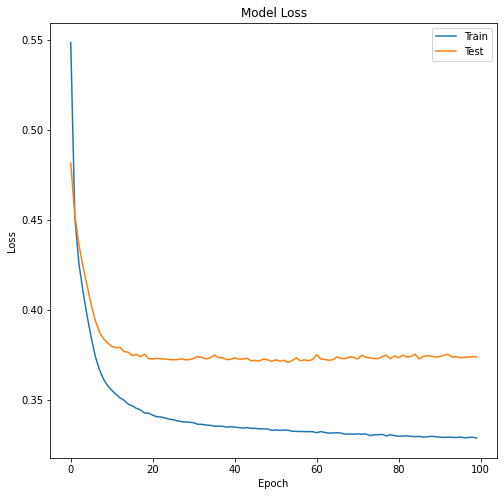

In [29]:
# Summarize history for loss

plt.figure(figsize=(8,8))

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Model evaluation

In [31]:
# Predicting the Test set results

y_pred = classifier.predict(X_test)

y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [33]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

cm

array([[1515,   80],
       [ 209,  196]])

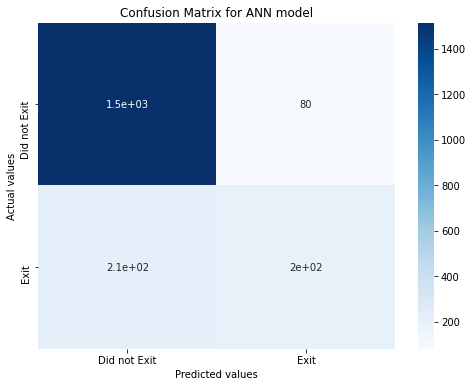

In [36]:
# Plot Confusion matrix

plt.figure(figsize=(8,6))

sns.heatmap(cm, cmap='Blues', annot=True, xticklabels=['Did not Exit', 'Exit'], yticklabels=['Did not Exit', 'Exit'])

plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for ANN model')
plt.show()

In [37]:
# Calculate the Accuracy

from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)
print('The accuracy for ANN model is: {}%'.format(score*100))

The accuracy for ANN model is: 85.55%


   # Hyperparameters:
#### 1. Number of hidden layers?
####    2. Number of neurons in each hidden layer?
####    3. Learning rate?

# Keras Tuner

In [40]:
pip install git+https://github.com/keras-team/keras-tuner.git@1.0.2rc0#egg=keras-tuner-1.0.2rc0

  Cloning https://github.com/keras-team/keras-tuner.git (to revision 1.0.2rc0) to /tmp/pip-install-dal_3f81/keras-tuner-1.0.2rc0
  Running command git clone -q https://github.com/keras-team/keras-tuner.git /tmp/pip-install-dal_3f81/keras-tuner-1.0.2rc0
  Running command git checkout -q 5d16a5a9cd883fe6366d523a5e59b72cfefb7f77
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2rc0-cp36-none-any.whl size=89059 sha256=e6032aabe55f45ce035fc27078a6a1577c53c974ccae48e013687e04fc196c4c
  Stored in directory: /tmp/pip-ephem-wheel-cache-pmunka5i/wheels/ab/97/20/917008aafbd47b823fb0bc43989739b1195c682036641a49d7
  ERROR: Failed building wheel for keras-tuner
  Running setup.py clean for keras-tuner
  ERROR: Failed cleaning build dir for keras-tuner
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp36-none-any.whl size=15356 sha256=01a5595af5dbbce0aa116d15e9f81de9b7e09aea158b658c01a0080f3adca554
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac

In [41]:
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

In [42]:
def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='linear'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

In [49]:

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='project',
    project_name='Bank Customer churn_2')

In [50]:
tuner.search_space_summary()

In [51]:
tuner.search(X_train, y_train,
             epochs=5,
             validation_data=(X_test, y_test))

Epoch 1/5
250/250 [==============================] - 1s 4ms/step - loss: 3.1467 - accuracy: 0.7960 - val_loss: 3.1236 - val_accuracy: 0.7975
Epoch 2/5
250/250 [==============================] - 1s 3ms/step - loss: 3.1467 - accuracy: 0.7960 - val_loss: 3.1236 - val_accuracy: 0.7975
Epoch 3/5
250/250 [==============================] - 1s 3ms/step - loss: 3.1467 - accuracy: 0.7960 - val_loss: 3.1236 - val_accuracy: 0.7975
Epoch 4/5
250/250 [==============================] - 1s 3ms/step - loss: 3.1467 - accuracy: 0.7960 - val_loss: 3.1236 - val_accuracy: 0.7975
Epoch 5/5
250/250 [==============================] - 1s 3ms/step - loss: 3.1467 - accuracy: 0.7960 - val_loss: 3.1236 - val_accuracy: 0.7975
Epoch 1/5
250/250 [==============================] - 1s 4ms/step - loss: 0.4247 - accuracy: 0.8226 - val_loss: 0.3671 - val_accuracy: 0.8535
Epoch 2/5
250/250 [==============================] - 1s 3ms/step - loss: 0.3759 - accuracy: 0.8470 - val_loss: 0.3840 - val_accuracy: 0.8620
Epoch 3/5
250

Epoch 1/5
250/250 [==============================] - 1s 4ms/step - loss: 0.4370 - accuracy: 0.8131 - val_loss: 0.3690 - val_accuracy: 0.8335
Epoch 2/5
250/250 [==============================] - 1s 3ms/step - loss: 0.3676 - accuracy: 0.8516 - val_loss: 0.3586 - val_accuracy: 0.8625
Epoch 3/5
250/250 [==============================] - 1s 3ms/step - loss: 0.3597 - accuracy: 0.8589 - val_loss: 0.3594 - val_accuracy: 0.8570
Epoch 4/5
250/250 [==============================] - 1s 3ms/step - loss: 0.3521 - accuracy: 0.8522 - val_loss: 0.3819 - val_accuracy: 0.8605
Epoch 5/5
250/250 [==============================] - 1s 3ms/step - loss: 0.3438 - accuracy: 0.8605 - val_loss: 0.3828 - val_accuracy: 0.8450
Epoch 1/5
250/250 [==============================] - 1s 4ms/step - loss: 0.4536 - accuracy: 0.8098 - val_loss: 0.4592 - val_accuracy: 0.8455
Epoch 2/5
250/250 [==============================] - 1s 3ms/step - loss: 0.3777 - accuracy: 0.8470 - val_loss: 0.3743 - val_accuracy: 0.8370
Epoch 3/5
250

Epoch 1/5
250/250 [==============================] - 1s 4ms/step - loss: 0.6193 - accuracy: 0.8039 - val_loss: 0.4402 - val_accuracy: 0.8340
Epoch 2/5
250/250 [==============================] - 1s 3ms/step - loss: 0.3927 - accuracy: 0.8367 - val_loss: 0.3808 - val_accuracy: 0.8525
Epoch 3/5
250/250 [==============================] - 1s 3ms/step - loss: 0.3742 - accuracy: 0.8484 - val_loss: 0.3770 - val_accuracy: 0.8520
Epoch 4/5
250/250 [==============================] - 1s 3ms/step - loss: 0.3587 - accuracy: 0.8539 - val_loss: 0.3815 - val_accuracy: 0.8545
Epoch 5/5
250/250 [==============================] - 1s 3ms/step - loss: 0.3464 - accuracy: 0.8560 - val_loss: 0.4036 - val_accuracy: 0.8490
Epoch 1/5
250/250 [==============================] - 1s 4ms/step - loss: 0.4657 - accuracy: 0.8061 - val_loss: 0.4055 - val_accuracy: 0.8400
Epoch 2/5
250/250 [==============================] - 1s 4ms/step - loss: 0.3885 - accuracy: 0.8404 - val_loss: 0.3764 - val_accuracy: 0.8570
Epoch 3/5
250

Epoch 1/5
250/250 [==============================] - 1s 4ms/step - loss: 0.4161 - accuracy: 0.8275 - val_loss: 0.3599 - val_accuracy: 0.8425
Epoch 2/5
250/250 [==============================] - 1s 4ms/step - loss: 0.4062 - accuracy: 0.8405 - val_loss: 0.4360 - val_accuracy: 0.8585
Epoch 3/5
250/250 [==============================] - 1s 4ms/step - loss: 0.4356 - accuracy: 0.8404 - val_loss: 0.3704 - val_accuracy: 0.8610
Epoch 4/5
250/250 [==============================] - 1s 4ms/step - loss: 0.4062 - accuracy: 0.8520 - val_loss: 0.4012 - val_accuracy: 0.8645
Epoch 5/5
250/250 [==============================] - 1s 3ms/step - loss: 0.7018 - accuracy: 0.8522 - val_loss: 0.7415 - val_accuracy: 0.8185
Epoch 1/5
250/250 [==============================] - 1s 4ms/step - loss: 0.4080 - accuracy: 0.8315 - val_loss: 0.3985 - val_accuracy: 0.8440
Epoch 2/5
250/250 [==============================] - 1s 3ms/step - loss: 0.3956 - accuracy: 0.8341 - val_loss: 0.3783 - val_accuracy: 0.8625
Epoch 3/5
250

Epoch 1/5
250/250 [==============================] - 1s 4ms/step - loss: 0.4738 - accuracy: 0.7995 - val_loss: 0.4321 - val_accuracy: 0.8110
Epoch 2/5
250/250 [==============================] - 1s 3ms/step - loss: 0.4004 - accuracy: 0.8266 - val_loss: 0.3964 - val_accuracy: 0.8415
Epoch 3/5
250/250 [==============================] - 1s 3ms/step - loss: 0.3775 - accuracy: 0.8421 - val_loss: 0.4108 - val_accuracy: 0.8455
Epoch 4/5
250/250 [==============================] - 1s 3ms/step - loss: 0.3665 - accuracy: 0.8521 - val_loss: 0.3704 - val_accuracy: 0.8640
Epoch 5/5
250/250 [==============================] - 1s 3ms/step - loss: 0.3583 - accuracy: 0.8545 - val_loss: 0.3644 - val_accuracy: 0.8655
Epoch 1/5
250/250 [==============================] - 1s 4ms/step - loss: 3.1467 - accuracy: 0.7960 - val_loss: 3.1236 - val_accuracy: 0.7975
Epoch 2/5
250/250 [==============================] - 1s 3ms/step - loss: 3.1467 - accuracy: 0.7960 - val_loss: 3.1236 - val_accuracy: 0.7975
Epoch 3/5
250

INFO:tensorflow:Oracle triggered exit


In [52]:
tuner.results_summary()